# How have casualties evolved throughout the years?

In [104]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["iyear","nkill","nwound"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [2]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,iyear,nkill,nwound
0,1970,1.0,0.0
1,1970,0.0,0.0
2,1970,1.0,0.0
3,1970,NaN,NaN
4,1970,NaN,NaN


In [3]:
data=data.fillna(0)
data.head()

,iyear,nkill,nwound
0,1970,1.0,0.0
1,1970,0.0,0.0
2,1970,1.0,0.0
3,1970,0.0,0.0
4,1970,0.0,0.0


In [5]:
data=data.groupby(['iyear'])['nkill','nwound'].sum().reset_index()
data.head()

,iyear,nkill,nwound
0,1970,171.0,192.0
1,1971,173.0,82.0
2,1972,566.0,222.0
3,1973,370.0,495.0
4,1974,542.0,754.0


In [7]:
data['Casualties'] = data['nkill'] +  data['nwound']
data.head()

,iyear,nkill,nwound,total,Casualties
0,1970,171.0,192.0,363.0,363.0
1,1971,173.0,82.0,255.0,255.0
2,1972,566.0,222.0,788.0,788.0
3,1973,370.0,495.0,865.0,865.0
4,1974,542.0,754.0,1296.0,1296.0


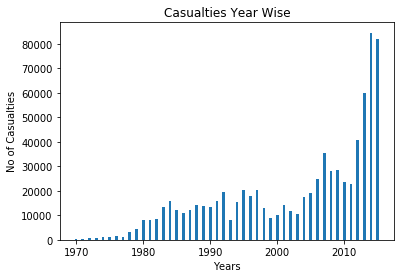

In [32]:
# Lets Plot this in form of a bar chart
from matplotlib import pyplot as plt


plt.bar(data['iyear'], data['total'], width= 0.4)
plt.xlabel('Years')
plt.ylabel('No of Casualties')
plt.title('Casualties Year Wise')
plt.show()

# Are certain nationalities more targeted? If yes, which one?

In [9]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["natlty1_txt"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [10]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,natlty1_txt
0,Dominican Republic
1,Belgium
2,United States
3,United States
4,United States


In [11]:
data=data.fillna(0)

In [12]:
data=pd.crosstab(index=data['natlty1_txt'],columns='count').reset_index()
data=data.sort_values(by='count',ascending=False)
data.head()

col_0,natlty1_txt,count
87,Iraq,18284
141,Pakistan,12326
83,India,10106
1,Afghanistan,8235
37,Colombia,7716


# Are some countries better at defending themselves against terrorist attacks? If yes, which is the safest country to live

In [17]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["country_txt","success"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [18]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,country_txt,success
0,Dominican Republic,1.0
1,Mexico,1.0
2,Philippines,1.0
3,Greece,1.0
4,Japan,1.0


In [59]:
data[data['success']==0].groupby('country_txt')['success'].count().reset_index().sort_values(by="success",ascending=True)

,country_txt,success
13,Belize,1
38,Dominica,1
133,Serbia,1
134,Serbia-Montenegro,1
98,Malta,1
17,Brunei,1
46,Fiji,1
47,Finland,1
49,French Guiana,1
125,Qatar,1


In [20]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["country_txt","success","attacktype1_txt"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [23]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,country_txt,success,attacktype1_txt
0,Dominican Republic,1.0,Assassination
1,Mexico,1.0,Hostage Taking (Kidnapping)
2,Philippines,1.0,Assassination
3,Greece,1.0,Bombing/Explosion
4,Japan,1.0,Facility/Infrastructure Attack


In [25]:
data=data[data['success']==0]

In [27]:
data.head()

,country_txt,success,attacktype1_txt
6,Uruguay,0.0,Assassination
10,United States,0.0,Bombing/Explosion
23,United States,0.0,Bombing/Explosion
39,Philippines,0.0,Unknown
43,United States,0.0,Facility/Infrastructure Attack


In [28]:
data1=data.groupby(['country_txt','attacktype1_txt'])['success'].count().reset_index()

In [47]:
data1=data1.rename(columns={'country_txt':'Country','attacktype1_txt':'Attack type','success':'Successfully Defended'})

In [56]:
data1=data1.sort_values(by='Successfully Defended',ascending=True)

In [106]:
data1.head()

,targtype1_txt,eventid
0,Abortion Related,1
12,Other,1
21,Utilities,1
20,Unknown,1
19,Transportation,1


# Terror attack pattern in United States vs Russian Federation/USSR in last 45 years

In [105]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["country_txt",'iyear','eventid']
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [118]:
data=data_12to15.append(data_70to91).append(data_92to11).append(data_93)
data

,eventid,iyear,country_txt
0,201201010001,2012,Pakistan
1,201201010002,2012,Kenya
2,201201010003,2012,Pakistan
3,201201010004,2012,Kenya
4,201201010005,2012,Pakistan
5,201201010006,2012,Pakistan
6,201201010007,2012,Iraq
7,201201010008,2012,Afghanistan
8,201201010009,2012,Afghanistan
9,201201010012,2012,Pakistan


In [113]:
Usa=data[data['country_txt']=='United States']
Usa.head()

,eventid,iyear,country_txt
16,201201010020,2012,United States
55,201201030019,2012,United States
56,201201030020,2012,United States
57,201201030021,2012,United States
58,201201030022,2012,United States


In [117]:
Usa1=Usa.groupby('iyear')['eventid'].count().reset_index()
Usa1.head()

,iyear,eventid
0,1970,468
1,1971,247
2,1972,64
3,1973,58
4,1974,94


In [119]:
Russia=data[data['country_txt']=='Russia']
Russia.head()

,eventid,iyear,country_txt
74,201201030043,2012,Russia
75,201201030044,2012,Russia
106,201201040035,2012,Russia
210,201201080029,2012,Russia
229,201201090024,2012,Russia


In [120]:
Russia1=Russia.groupby('iyear')['eventid'].count().reset_index()
Russia1.head()

,iyear,eventid
0,1992,21
1,1993,4
2,1994,47
3,1995,37
4,1996,66


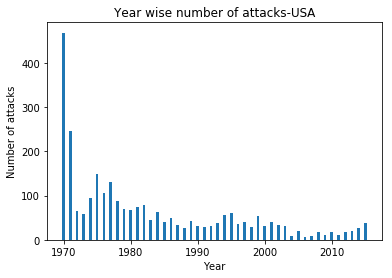

In [122]:
#USA Attack PLot
import matplotlib
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(Usa1['iyear'],Usa1['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-USA')

plt.show()

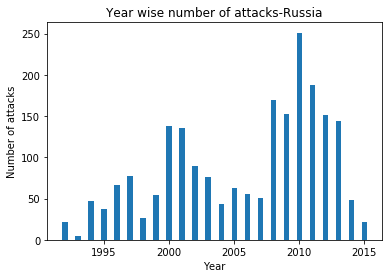

In [123]:
#USA Attack PLot
import matplotlib
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(Russia1['iyear'],Russia1['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-Russia')

plt.show()

# Terrorist attack in India and Pakistan in last 45 years

In [61]:
gtd1993=pd.read_csv('gtd1993_748.csv',encoding='ISO-8859–1')
gtd1215=pd.read_csv('gtd_12to15_52134.csv',encoding='ISO-8859–1',low_memory=False)
gtd7091=pd.read_csv('gtd_70to91_49566.csv',encoding='ISO-8859–1',low_memory=False)
gtd9211=pd.read_csv('gtd_92to11_no 93_55072.csv',encoding='ISO-8859–1',low_memory=False)

In [62]:
india=gtd1993[gtd1993['country_txt']=='India']

In [63]:
india=india.append(gtd1215[gtd1215['country_txt']=='India'],sort=False)

In [64]:
india=india.append(gtd7091[gtd7091['country_txt']=='India'],sort=False)

In [65]:
india=india.append(gtd9211[gtd9211['country_txt']=='India'],sort=False)

In [66]:
india.drop_duplicates().head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,targsubtype3,targsubtype3_txt,ingroup,ingroup2,ingroup3,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
53,199301220005,1993,1,22,NaN,1,1/23/93,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,199301260001,1993,1,26,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,199301300003,1993,1,30,NaN,1,2/21/93,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,199303120002,1993,3,12,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,199303120003,1993,3,12,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
len(india)

9982

In [68]:
pak=gtd1993[gtd1993['country_txt']=='Pakistan']

In [69]:
pak=pak.append(gtd1215[gtd1215['country_txt']=='Pakistan'],sort=False)

In [70]:
pak=pak.append(gtd7091[gtd7091['country_txt']=='Pakistan'],sort=False)

In [71]:
pak=pak.append(gtd9211[gtd9211['country_txt']=='Pakistan'],sort=False)

In [72]:
len(pak)

12776

In [73]:
pak=pak.drop_duplicates()

In [74]:
india=india.groupby('iyear')['eventid'].count().reset_index()

In [75]:
india.head()

,iyear,eventid
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20


In [76]:
len(india)

41

In [103]:
india.head()

,iyear,eventid
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20


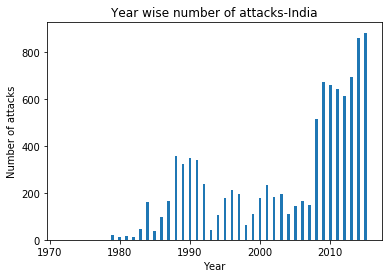

In [79]:
import matplotlib
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[10,10]
%matplotlib inline
plt.bar(india['iyear'],india['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-India')

plt.show()

In [80]:
pak=pak.groupby('iyear')['eventid'].count().reset_index()

In [81]:
pak.head()

,iyear,eventid
0,1970,1
1,1974,2
2,1975,2
3,1976,3
4,1978,2


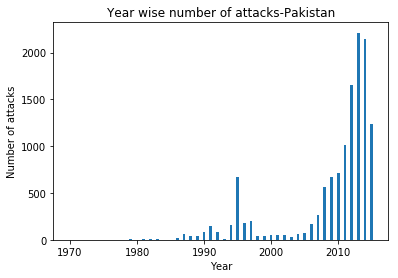

In [82]:
from matplotlib import pyplot as  plt
plt.rcParams['figure.figsize']=[20,20]
%matplotlib inline
plt.bar(pak['iyear'],pak['eventid'],width=0.4)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Year wise number of attacks-Pakistan')

plt.show()

# Heaviest hit Target types (Based on both Killed and wounded)

In [86]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA TERROR"
os.chdir(path)
os.listdir(path)
col=["targtype1_txt","eventid"]
data_12to15=pd.read_csv("gtd_12to15_52134.csv",usecols=col)
data_70to91=pd.read_csv("gtd_70to91_49566.csv",usecols=col)
data_92to11= pd.read_csv("gtd_92to11_no 93_55072.csv",usecols=col)
data_93= pd.read_csv('gtd1993_748.csv',usecols=col)

In [101]:
data=data_70to91.append(data_92to11).append(data_93).append(data_12to15)
data.head()

,eventid,targtype1_txt
0,197000000001,Private Citizens & Property
1,197000000002,Government (Diplomatic)
2,197001000001,Journalists & Media
3,197001000002,Government (Diplomatic)
4,197001000003,Government (Diplomatic)


In [102]:
data=data.groupby('targtype1_txt')['eventid'].count().reset_index()
data.sort_values(by='eventid',ascending=False).head()

,targtype1_txt,eventid
14,Private Citizens & Property,36076
10,Military,23036
13,Police,21285
7,Government (General),19334
3,Business,18959
